Loaded dataset with shape: (891, 15)

Missing values by column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Percent missing by column:
 survived        0.00
pclass          0.00
sex             0.00
age            19.87
sibsp           0.00
parch           0.00
fare            0.00
embarked        0.22
class           0.00
who             0.00
adult_male      0.00
deck           77.22
embark_town     0.22
alive           0.00
alone           0.00
dtype: float64


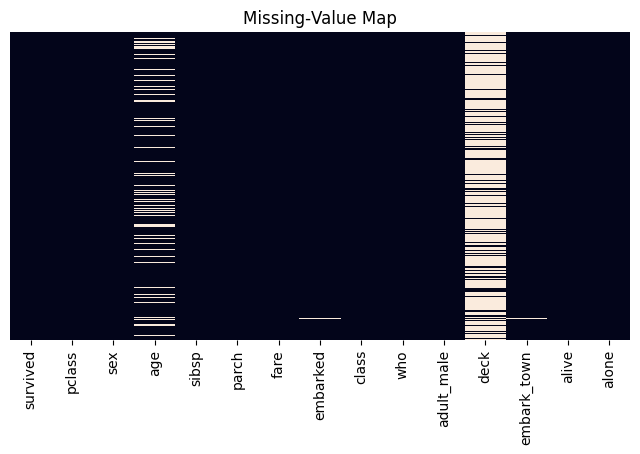


Numeric summary:
           count       mean        std   min      25%      50%   75%       max
survived  891.0   0.383838   0.486592  0.00   0.0000   0.0000   1.0    1.0000
pclass    891.0   2.308642   0.836071  1.00   2.0000   3.0000   3.0    3.0000
age       714.0  29.699118  14.526497  0.42  20.1250  28.0000  38.0   80.0000
sibsp     891.0   0.523008   1.102743  0.00   0.0000   0.0000   1.0    8.0000
parch     891.0   0.381594   0.806057  0.00   0.0000   0.0000   0.0    6.0000
fare      891.0  32.204208  49.693429  0.00   7.9104  14.4542  31.0  512.3292


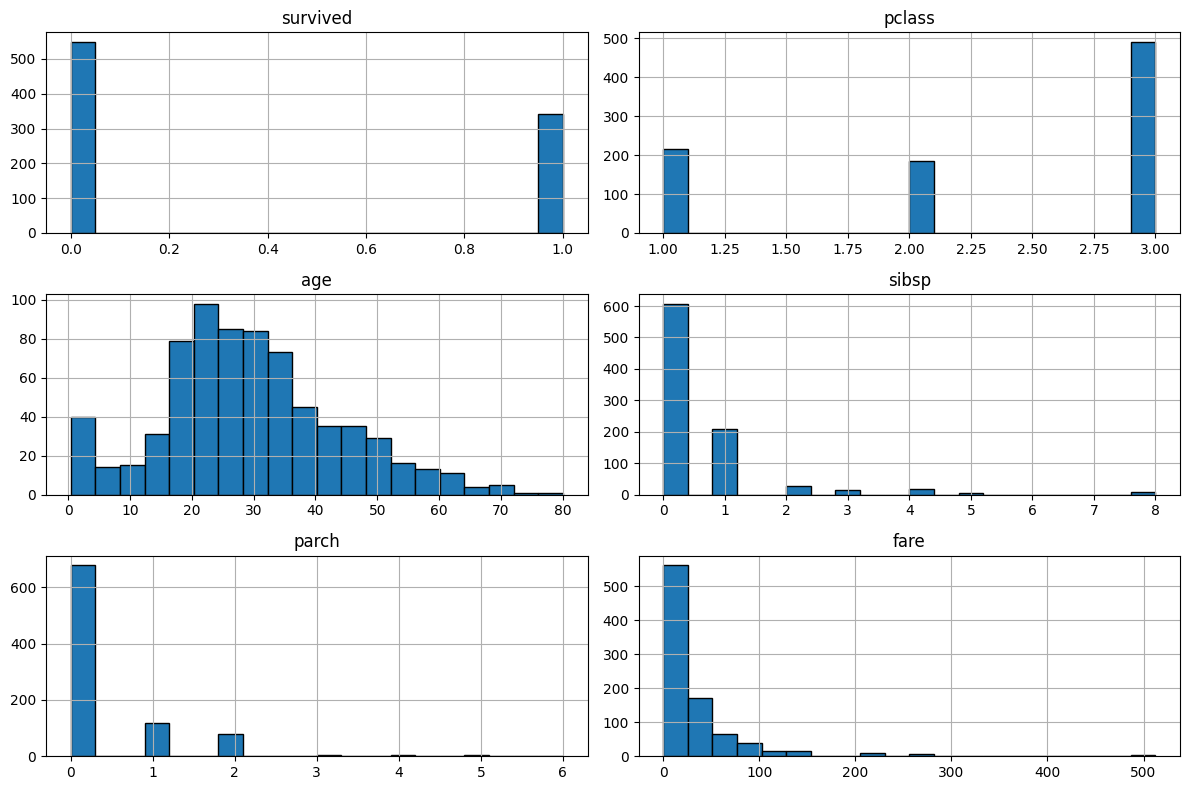


Value counts for `sex`:
 sex
male      577
female    314
Name: count, dtype: int64


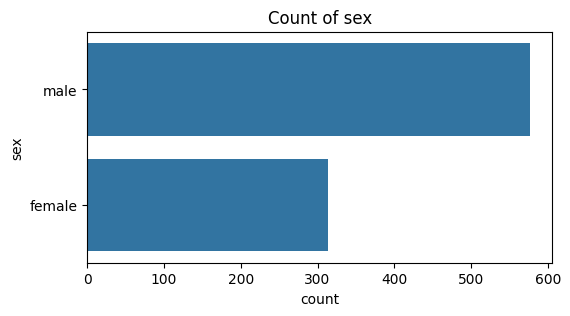


Value counts for `embarked`:
 embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


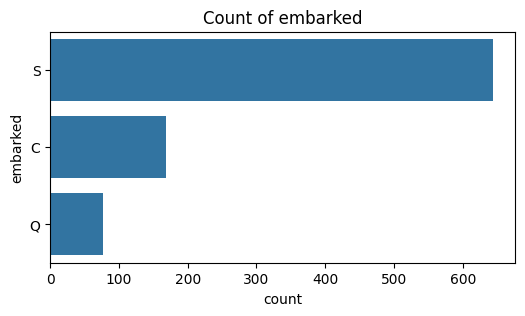


Value counts for `class`:
 class
Third     491
First     216
Second    184
Name: count, dtype: int64


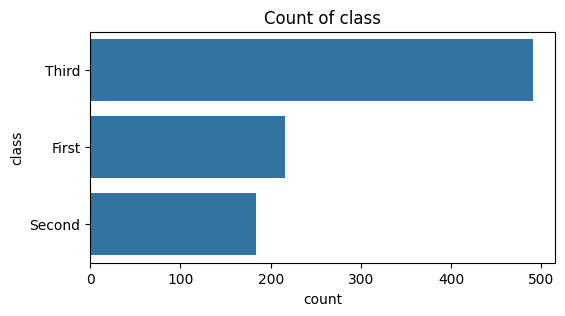


Value counts for `who`:
 who
man      537
woman    271
child     83
Name: count, dtype: int64


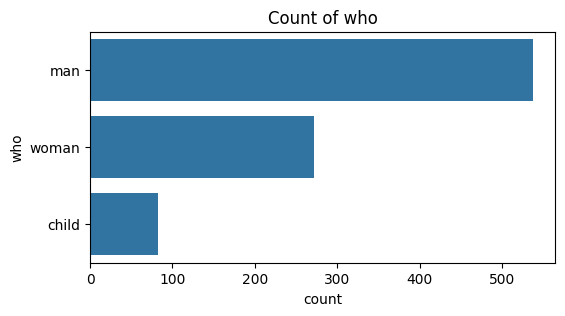


Value counts for `adult_male`:
 adult_male
True     537
False    354
Name: count, dtype: int64


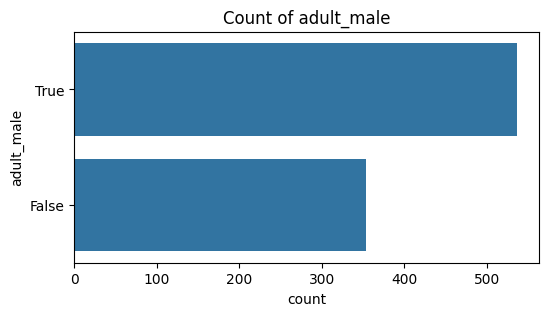


Value counts for `deck`:
 deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64


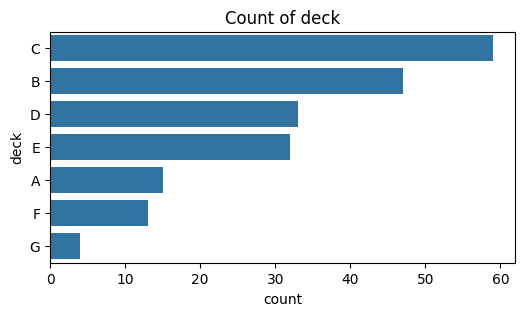


Value counts for `embark_town`:
 embark_town
Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: count, dtype: int64


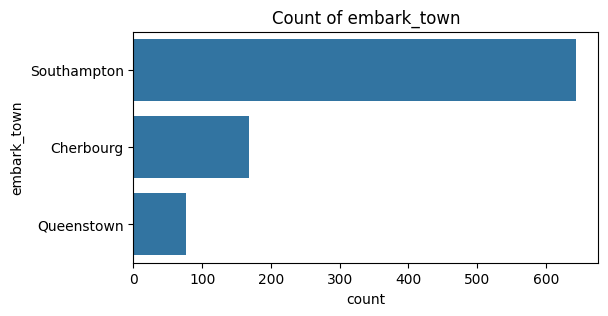


Value counts for `alive`:
 alive
no     549
yes    342
Name: count, dtype: int64


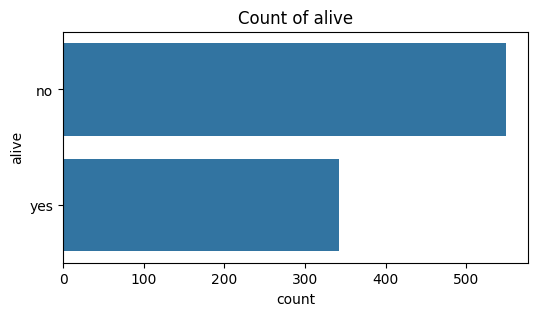


Value counts for `alone`:
 alone
True     537
False    354
Name: count, dtype: int64


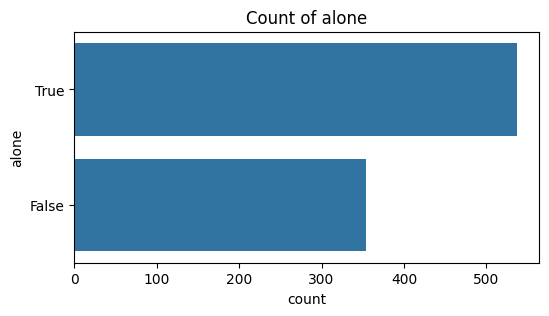


Missing after imputation:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64
Rows before cleaning: 891, after outlier removal: 577


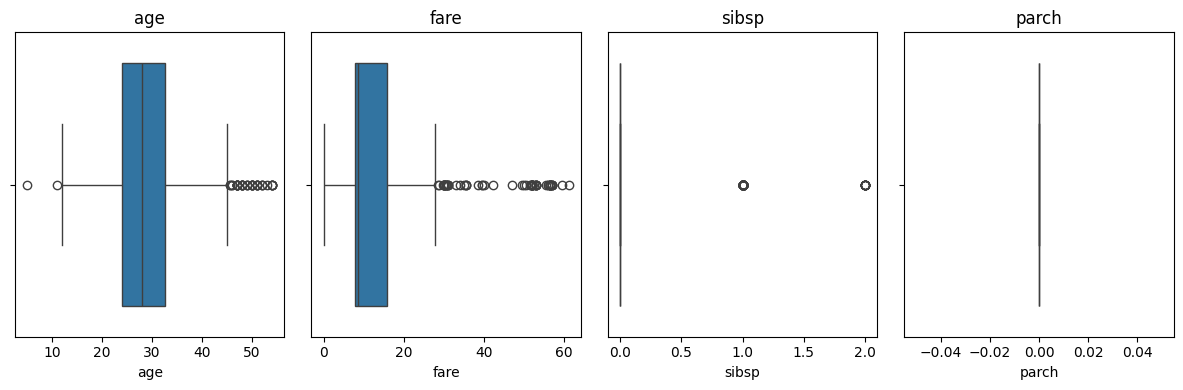


Encoded feature matrix shape: (577, 17)
Features kept by VarianceThreshold: ['pclass', 'age', 'sibsp', 'fare', 'adult_male', 'alone', 'sex_male', 'embarked_Q', 'embarked_S', 'class_Second', 'class_Third', 'who_man', 'who_woman', 'embark_town_Queenstown', 'embark_town_Southampton', 'alive_yes']
Top 5 features by mutual information: ['adult_male', 'sex_male', 'who_man', 'who_woman', 'alive_yes']
Top 10 RF feature importances: {'alive_yes': 0.7196218777550063, 'who_man': 0.07063259791482458, 'adult_male': 0.05370778054901231, 'fare': 0.043530525669285294, 'sex_male': 0.03449409244908549, 'age': 0.02124710467316074, 'who_woman': 0.015003375194230279, 'pclass': 0.01245021018707152, 'class_Third': 0.010223208652854088, 'embarked_S': 0.003236611370148237}


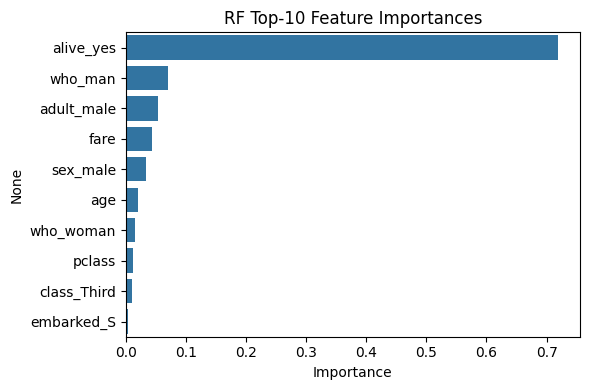


Train/Test shapes: (461, 17) (116, 17)

Post‑scaling means (train):
 pclass   -0.0
age      -0.0
sibsp    -0.0
parch     0.0
fare      0.0
dtype: float64

Post‑scaling stds (train):
 pclass    1.001
age       1.001
sibsp     1.001
parch     0.000
fare      1.001
dtype: float64

PCA components chosen: 7
Cumulative explained variance:
 [0.348 0.555 0.686 0.804 0.882 0.939 0.96 ]

PCA‑based model accuracy: 0.974

Classification report (PCA):
              precision    recall  f1-score   support

           0      0.964     1.000     0.982        81
           1      1.000     0.914     0.955        35

    accuracy                          0.974       116
   macro avg      0.982     0.957     0.969       116
weighted avg      0.975     0.974     0.974       116



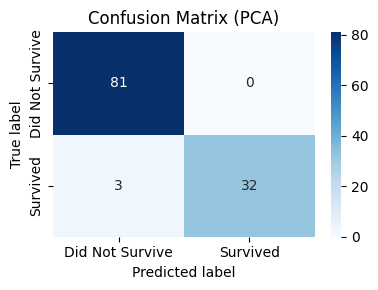


Raw‑features model accuracy: 1.000

Classification report (raw):
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        81
           1      1.000     1.000     1.000        35

    accuracy                          1.000       116
   macro avg      1.000     1.000     1.000       116
weighted avg      1.000     1.000     1.000       116

Comparison result: Raw did better—consider revisiting PCA threshold.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = sns.load_dataset('titanic')
print("Loaded dataset with shape:", df.shape)
print("\nMissing values by column:\n", df.isnull().sum())
print("\nPercent missing by column:\n", (df.isnull().mean() * 100).round(2))

plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing‑Value Map")
plt.show()
num_cols = df.select_dtypes(include=['int64','float64']).columns
print("\nNumeric summary:\n", df[num_cols].describe().T)
df[num_cols].hist(figsize=(12,8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()
cat_cols = df.select_dtypes(include=['object','category','bool']).columns
for col in cat_cols:
    print(f"\nValue counts for `{col}`:\n", df[col].value_counts(dropna=False))
    plt.figure(figsize=(6,3))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.show()


df_clean = df.copy()
df_clean = df_clean.drop(columns=['deck'])
df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())
for col in ['embarked', 'embark_town']:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
print("\nMissing after imputation:\n", df_clean.isnull().sum())
num_cols = ['age','fare','sibsp','parch']
Q1 = df_clean[num_cols].quantile(0.25)
Q3 = df_clean[num_cols].quantile(0.75)
IQR = Q3 - Q1
mask = ~((df_clean[num_cols] < (Q1 - 1.5 * IQR)) |
         (df_clean[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df_no_outliers = df_clean[mask].reset_index(drop=True)
print(f"Rows before cleaning: {df.shape[0]}, after outlier removal: {df_no_outliers.shape[0]}")
plt.figure(figsize=(12,4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(x=df_no_outliers[col])
    plt.title(col)
plt.tight_layout()
plt.show()

y = df_no_outliers['survived']
X = df_no_outliers.drop(columns=['survived'])
X_enc = pd.get_dummies(X, drop_first=True)
print("\nEncoded feature matrix shape:", X_enc.shape)
vt = VarianceThreshold(threshold=0.01)
vt.fit(X_enc)
kept = X_enc.columns[vt.get_support()]
print("Features kept by VarianceThreshold:", list(kept))
k = 5
skb = SelectKBest(mutual_info_classif, k=k).fit(X_enc, y)
top_k = X_enc.columns[skb.get_support()]
print(f"Top {k} features by mutual information:", list(top_k))
rf_fs = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_enc, y)
importances = pd.Series(rf_fs.feature_importances_, index=X_enc.columns)
importances = importances.sort_values(ascending=False)
print("Top 10 RF feature importances:", importances.head(10).to_dict())
plt.figure(figsize=(6,4))
sns.barplot(x=importances.head(10), y=importances.head(10).index)
plt.title("RF Top‑10 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_enc, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)
print("\nTrain/Test shapes:", X_train_raw.shape, X_test_raw.shape)
num_features = X_train_raw.select_dtypes(include=['int64','float64']).columns.tolist()
scaler = StandardScaler().fit(X_train_raw[num_features])
X_train_scaled = X_train_raw.copy()
X_test_scaled  = X_test_raw.copy()
X_train_scaled[num_features] = scaler.transform(X_train_raw[num_features])
X_test_scaled[num_features]  = scaler.transform(X_test_raw[num_features])
print("\nPost‑scaling means (train):\n", X_train_scaled[num_features].mean().round(3))
print("\nPost‑scaling stds (train):\n", X_train_scaled[num_features].std().round(3))
pca = PCA(n_components=0.95, random_state=42).fit(X_train_scaled)
print("\nPCA components chosen:", pca.n_components_)
print("Cumulative explained variance:\n", np.round(np.cumsum(pca.explained_variance_ratio_), 3))
X_train_pca = pca.transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
print(f"\nPCA‑based model accuracy: {acc_pca:.3f}")
print("\nClassification report (PCA):")
print(classification_report(y_test, y_pred_pca, digits=3))

cm = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Did Not Survive","Survived"],
            yticklabels=["Did Not Survive","Survived"])
plt.title("Confusion Matrix (PCA)")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()
rf_raw = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_raw, y_train)
y_pred_raw = rf_raw.predict(X_test_raw)
acc_raw = accuracy_score(y_test, y_pred_raw)
print(f"\nRaw‑features model accuracy: {acc_raw:.3f}")

print("\nClassification report (raw):")
print(classification_report(y_test, y_pred_raw, digits=3))

print("Comparison result:",
      "PCA improved performance." if acc_pca > acc_raw
      else "Performance unchanged." if acc_pca == acc_raw
      else "Raw did better—consider revisiting PCA threshold.")
